# Word Embeddings

### Libraries

In [1]:
# import libraries

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

### Datasets

In [2]:
# load review sentiment data

review_df = pd.read_csv('data/review_sentiment.csv')

review_df

,review_id,text,negative,neutral,positive
0,NvusujU9_5pIUbn9SZ6hMA,Stopped by to munch a burger during today's Se...,0,0,1
1,vHOeBa7aMA_na4rfS2Db5A,"Yelp doesn't allow to leave 0 star review, so ...",1,0,0
2,hG9RTxxivb0ZXzEk4JXTXA,I find it hard to believe there are so many pe...,1,0,0
3,zIVkwgahZjOneChZFUYY4g,Love this place! Almost all of their menu item...,0,0,1
4,DLczAuvMAlAnY5EeDGhTVg,Excellent customer service. I wish I could ren...,0,0,1
...,...,...,...,...,...
63446,OgoBp7fbXnLSKvsQb4O_tw,"I really loved the food and service. I mean, t...",0,0,1
63447,Q7e8EtZMmdknDrQE7huMoQ,Their Grove location was the bomb. Delicious f...,0,0,1
63448,zzMW6zbsFaQMjoGu2bGVdA,A nice ean BBQ joint right across from some ne...,0,0,1
63449,scgoa60EvhW2Mz7JMqLYGw,The perfect Hookah bar. I'm not sure what they...,0,0,1


### Preprocessing

In [3]:
# preprocess the reviews using gensim

corpus = []
for review in review_df['text']:
    corpus.append(simple_preprocess(review))

In [4]:
# see content of processed reviews

for review in corpus[:5]:
    print('-' * 50)
    print(review)

--------------------------------------------------
['stopped', 'by', 'to', 'munch', 'burger', 'during', 'today', 'seahawks', 'saints', 'game', 'and', 'the', 'place', 'was', 'unsurprisingly', 'packed', 'for', 'good', 'reason', 'too', 'the', 'haven', 'burger', 'ordered', 'was', 'fantastic', 'sat', 'right', 'next', 'to', 'the', 'door', 'so', 'didn', 'get', 'the', 'chance', 'to', 'get', 'more', 'than', 'six', 'feet', 'into', 'the', 'place', 'as', 'soon', 'as', 'got', 'my', 'meal', 'the', 'place', 'started', 'getting', 'busier', 'and', 'busier', 'until', 'had', 'to', 'work', 'my', 'way', 'through', 'the', 'world', 'shortest', 'people', 'maze', 'to', 'get', 'out', 'guess', 'that', 'means', 'wasn', 'the', 'first', 'person', 'to', 'hear', 'about', 'the', 'place', 'will', 'be', 'going', 'back', 'to', 'the', 'haven', 'might', 'go', 'for', 'say', 'lunch', 'on', 'tuesday', 'so', 'it', 'less', 'busy']
--------------------------------------------------
['yelp', 'doesn', 'allow', 'to', 'leave', 'star

### Dense embeddings

In [5]:
# documents representing reviews

documents = corpus

len(documents)

63451

In [6]:
# see contents of documents

print(documents[0])

['stopped', 'by', 'to', 'munch', 'burger', 'during', 'today', 'seahawks', 'saints', 'game', 'and', 'the', 'place', 'was', 'unsurprisingly', 'packed', 'for', 'good', 'reason', 'too', 'the', 'haven', 'burger', 'ordered', 'was', 'fantastic', 'sat', 'right', 'next', 'to', 'the', 'door', 'so', 'didn', 'get', 'the', 'chance', 'to', 'get', 'more', 'than', 'six', 'feet', 'into', 'the', 'place', 'as', 'soon', 'as', 'got', 'my', 'meal', 'the', 'place', 'started', 'getting', 'busier', 'and', 'busier', 'until', 'had', 'to', 'work', 'my', 'way', 'through', 'the', 'world', 'shortest', 'people', 'maze', 'to', 'get', 'out', 'guess', 'that', 'means', 'wasn', 'the', 'first', 'person', 'to', 'hear', 'about', 'the', 'place', 'will', 'be', 'going', 'back', 'to', 'the', 'haven', 'might', 'go', 'for', 'say', 'lunch', 'on', 'tuesday', 'so', 'it', 'less', 'busy']


In [7]:
# model training

model = Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)

In [8]:
# embeddings

model.wv.get_vector("good")

array([-1.65503006e-02, -7.08080456e-02, -2.54945993e-01, -2.15923153e-02,
        5.16927838e-02,  7.79310167e-02,  6.34546801e-02,  1.92393661e-01,
        1.17050782e-01,  8.05542618e-02,  1.07546590e-01, -1.55633613e-01,
       -1.83467388e-01,  4.39457670e-02, -2.80966666e-02,  3.77290994e-01,
       -4.81955931e-02, -9.89525169e-02, -6.92601455e-03,  8.42960104e-02,
        2.34686509e-01,  1.44949719e-01,  4.17269558e-01,  1.60662219e-01,
        2.48656258e-01,  4.40166827e-04,  1.00164309e-01, -1.92942709e-01,
       -1.31843060e-01, -1.66767180e-01, -4.00530808e-02, -1.37355000e-01,
        2.75023989e-02, -2.24255383e-01, -1.61918953e-01, -8.39829370e-02,
        1.52167762e-02, -6.98088408e-02,  5.44385165e-02,  7.84674585e-02,
       -6.42942265e-03, -1.02868855e-01,  1.50404602e-01, -2.08587632e-01,
       -6.41967729e-02, -1.65232971e-01, -1.84885100e-01, -1.84646964e-01,
       -4.90507856e-02, -4.33915891e-02, -4.29192215e-01,  1.46665424e-01,
        1.08686246e-01, -

In [9]:
# similarity

model.wv.most_similar(positive="good")

[('tasty', 0.7680354714393616),
 ('great', 0.7627661824226379),
 ('decent', 0.7317320704460144),
 ('gooood', 0.7040425539016724),
 ('gauc', 0.7019708156585693),
 ('unflavorful', 0.6997774243354797),
 ('ok', 0.6969814300537109),
 ('definetly', 0.6947609186172485),
 ('verdes', 0.6933496594429016),
 ('darned', 0.6928594708442688)]

In [10]:
# similarity

model.wv.most_similar(positive="bad")

[('terrible', 0.717540979385376),
 ('horrible', 0.6636315584182739),
 ('good', 0.6622781157493591),
 ('crappy', 0.6444217562675476),
 ('poor', 0.6270184516906738),
 ('sucked', 0.6244748830795288),
 ('affects', 0.6189008951187134),
 ('harsh', 0.6166673898696899),
 ('crummy', 0.6163368821144104),
 ('bleh', 0.6150140166282654)]

In [12]:
# save full model (including trainable vectors to resume training)

model.save("embeddings/reviews_model")

In [13]:
# save model word vectors

model.wv.save("embeddings/reviews_wv")

### Vector visualization

In [14]:
def reduce_dimensions(model, num_dimensions=2, words=[]):
    '''
    Reduce the dimensions of the word vectors using t-SNE for plotting
    '''
    vectors = []
    labels = []
    if (words == []):
        words = model.wv.index_to_key
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=2.0)
    vectors = tsne.fit_transform(vectors)
    return vectors, labels

In [15]:
def plot_word_vectors(x_vals, y_vals, labels, words=[]):
    '''
    Plot the reduced dimensions of the word vectors using matplotlib
    '''
    random.seed(0)
    x_vals_new = np.array([])
    y_vals_new = np.array([])
    labels_new = np.array([])
    if(words == []):
        x_vals_new = x_vals
        y_vals_new = y_vals
        labels_new = labels
    else:
        for i in range(len(labels)):
            if(labels[i] in words):
                x_vals_new = np.append(x_vals_new,x_vals[i])
                y_vals_new = np.append(y_vals_new,y_vals[i])
                labels_new = np.append(labels_new,labels[i])
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals_new, y_vals_new)
    for i in range(len(labels_new)):
        plt.annotate(labels_new[i], (x_vals_new[i], y_vals_new[i]))
    plt.show()

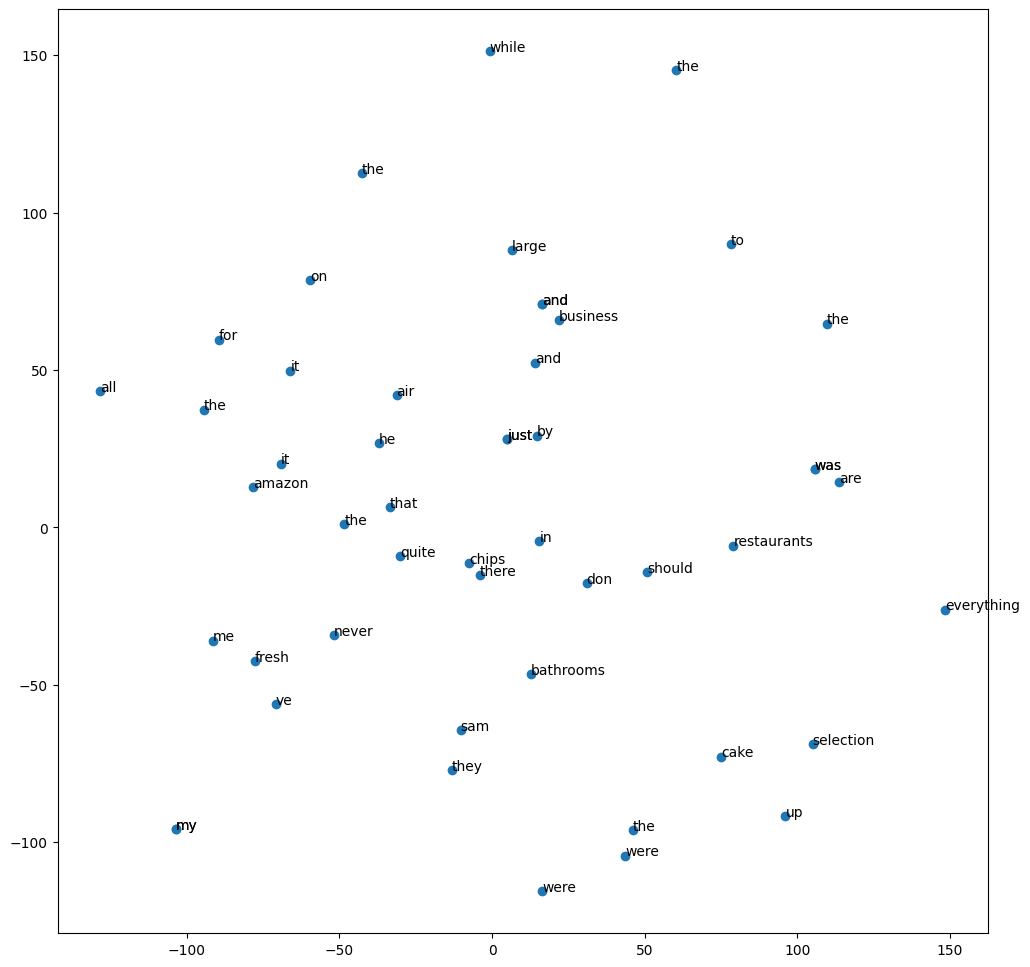

In [18]:
# visualize word vectors

all_words = [word for doc in documents for word in doc]
words = random.sample(all_words, 50)

vectors, labels = reduce_dimensions(model, 3, words)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plot_word_vectors(x_vals, y_vals, labels, words)

# TODO: maybe select a few interesting words to visualize their distances